## Basics of Probability

### Tossing a coin 10,000 times and calculating the experimental probability of heads and tails. 

In [119]:
import numpy as np 
from itertools import product 
import random
import matplotlib.pyplot as plt
from scipy.stats import expon

In [5]:
toss = np.random.choice(['H','T'],size = 10000)
toss

array(['T', 'H', 'T', ..., 'T', 'H', 'H'], dtype='<U1')

In [24]:
tails = [i for i in toss if i == 'T']
heads = [j for j in toss if j == 'H']                                             
print('probability of tails:', len(tails))
print('probability of Heads:', len(heads))

probability of tails: 4989
probability of Heads: 5011


### Rolling two dice and computing the probability of getting a sum of 7

In [35]:
dice = list(product(range(1,7), repeat=2))

In [34]:
dice_pro = [i for i in dice if sum(i) == 7]
print ('Probability of getting a sum of 7 :',dice_pro)

Probability of getting a sum of 7 : [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]


### Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.


In [56]:
d = ['1','2','3','4','5','6']
dice_1 = [random.choice(d) for i in range(10)]
dice_1

['4', '2', '5', '2', '2', '2', '5', '6', '2', '6']

In [57]:
dice_roll = [j for j in dice_1 if j == '6']
print('the probability of getting at least one "6" :', len(dice_roll))

the probability of getting at least one "6" : 2


# Conditional Probability and Bayes' Theorem


In [59]:
balls = ['red']*5+['green']*7+['blue']*8

In [90]:
drawn = [random.choice(balls) for i in range(1000)]
blue_count = 0
red_count = 0
for i in range(1,1000):
    if drawn[i-1] == 'blue':
        blue_count += 1
        if drawn[i] == 'red':
            red_count += 1
                
                
probability = red_count/blue_count

print('The probability of drawing a red ball given that the previous ball was blue: ',probability)        


The probability of drawing a red ball given that the previous ball was blue:  0.28296703296703296


In [91]:
blue_previous = 0
red_current = 0
total_red = 0

for i in range(1,1000):
    if drawn[i-1] == 'blue':
        blue_previous += 1
        if drawn[i] == 'red':
            red_current += 1
           
        
    if drawn[i] == 'red':
            total_red += 1
            
probability_red_blue = blue_previous/red_current
probability_blue = blue_previous/ (1000-1)
probability_red = red_current/1000

p_previous_blue_current_red = probability_red_blue * probability_blue / probability_red

p_previous_blue_current_red

12.50152027793653

# Random Variables and Discrete Probability


### Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25  
  - P(X=2) = 0.35  
  - P(X=3) = 0.4  


In [106]:
a = [1,2,3]
p = [0.25,0.35,0.4]
variable = np.random.choice(a,size = 1000, p=p)

mean = np.mean(variable)
standard_deviation = np.std(variable)
variance = np.var(variable)

print('The mean of the discrete random variable:', mean)
print('The standard_deviation of the discrete random variable:', standard_deviation)
print('The variance of the discrete random variable:', variance)

The mean of the discrete random variable: 2.116
The standard_deviation of the discrete random variable: 0.7990894818479343
The variance of the discrete random variable: 0.638544


# Continuous Random Variables

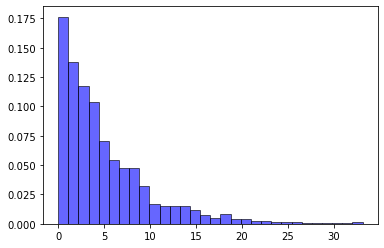

In [164]:
mean = 5
size = 2000

variables = np.random.exponential(scale=mean,size=size)
plt.hist(variables,bins=30,density=True,alpha = 0.6, color= 'blue',label = 'Histogram',edgecolor='black')
plt.show()

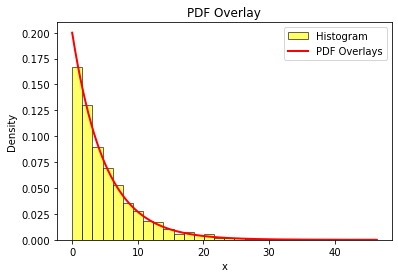

In [163]:
plt.hist(variables,bins=30,density=True,alpha = 0.6, color= 'yellow',label = 'Histogram',edgecolor='black')
x = np.linspace(0, max(variables),1000)
pdf = expon.pdf(x,scale=mean)
plt.plot(x,pdf,'r',linewidth=2,label = 'PDF Overlays')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('PDF Overlay')
plt.legend()
plt.show()


# Central Limit Theorem


### Simulate the Central Limit Theorem by following these steps  

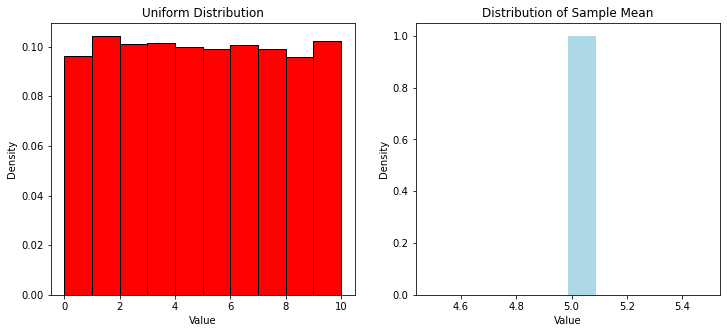

In [162]:
population = np.random.uniform(low=0, high=10, size=10000)

sample = np.random.choice(population,size = (1000,30), replace = True)

sample_mean = np.mean(sample)


plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(population,bins=10,density=True,edgecolor='black', color='red',label = 'population')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Uniform Distribution')

plt.subplot(1, 2, 2)
plt.hist(sample_mean,bins=10, color='lightblue',label = 'sample')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Sample Mean')

plt.show()